# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Import API key
from api_keys import weather_api_key

In [3]:
# My unique weather api key 
weather_api_key = "xxx"

In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Output File (CSV)
cities_csv_file = "cities.csv"
cities_csv_file

# Read cities file 
cities_csv_file = pd.read_csv(cities_csv_file)

In [6]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# URL taken from openweathermap including my API key 
base_url = "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}"

# List of cities 
Cities = []


In [9]:
#print log of each city as it's being processed with the city number and city name
print("start of data city")

start of data city


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
cities_pd = pd.read_csv("cities.csv")
cities_pd.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [11]:
# Loop through the cities_pd and run a lat/long search for each city
params = {"key": weather_api_key}

for index, row in cities_pd.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['City_ID']
    country = row['Country']
    
    params['address'] = f"{city},{country}"
    
    cities_lat_lng = requests.get(base_url, params=params)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
cities_pd.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,273.500000,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,158.338246,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,136.750000,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,273.500000,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,410.250000,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


In [13]:
#  Get the indices of cities that have humidity over 100%.                          
over_100_data = cities_pd[(cities_pd["Humidity"] > 100)].index
over_100_data

Int64Index([129], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_pd.drop(over_100_data, inplace=False)
clean_city_data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [19]:
# Infomation of intrest in data frame
reduced_clean_city_df = clean_city_data[["City","Lat", "Max Temp", "Humidity", "Cloudiness",
                        "Wind Speed"]]
reduced_clean_city_df.head()

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,ostrovnoy,68.05,37.50,72,2,7.16
1,mahebourg,-20.41,78.80,74,75,11.41
2,qaanaaq,77.48,22.20,73,25,2.37
3,zhuhai,40.71,44.60,39,0,4.47
4,cape town,-33.93,55.99,76,20,8.05


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

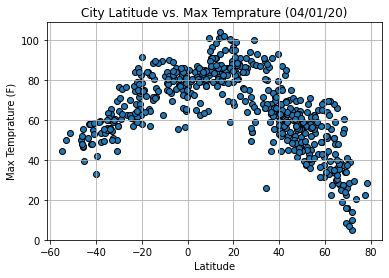

In [33]:
# Plot scatter 
plt.scatter(reduced_clean_city_df['Lat'],reduced_clean_city_df['Max Temp'],edgecolor="black")
plt.grid()

# Labelling
plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temprature (04/01/20)")

# Save as png
plt.savefig("Figure 1 Latitude vs Temprature.png")

plt.show()

## Latitude vs. Humidity Plot

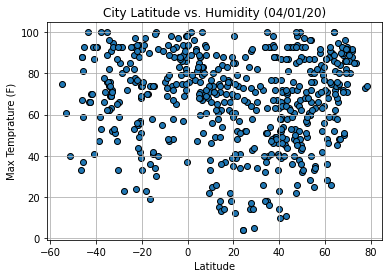

In [34]:
# Plot scatter 
plt.scatter(reduced_clean_city_df['Lat'],reduced_clean_city_df['Humidity'],edgecolor="black")
plt.grid()

# Labelling
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (04/01/20)")

# Save as png
plt.savefig("Figure 2 Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

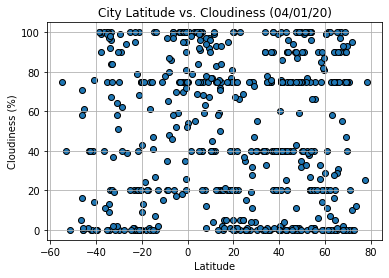

In [38]:
# Plot scatter 
plt.scatter(reduced_clean_city_df['Lat'],reduced_clean_city_df['Cloudiness'],edgecolor="black")
plt.grid()

# Labelling
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# Save as png
plt.savefig("Figure 3 Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

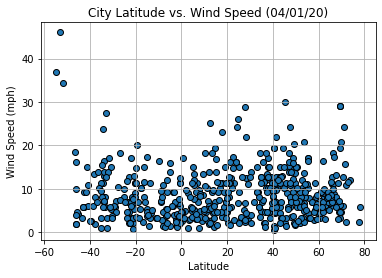

In [35]:
# Plot scatter 
plt.scatter(reduced_clean_city_df['Lat'],reduced_clean_city_df['Wind Speed'],edgecolor="black")
plt.grid()

# Labelling
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (04/01/20)")

# Save as png
plt.savefig("Figure 4 Latitude vs Wind Speed.png")

plt.show()

## Linear Regression

In [56]:
# Dataframe for southern and northern hemisphere 
northern_df = reduced_clean_city_df.loc[(reduced_clean_city_df["Lat"] >= 0)]
southern_df = reduced_clean_city_df.loc[(reduced_clean_city_df["Lat"] < 0)]
northern_df.head()

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,ostrovnoy,68.05,37.50,72,2,7.16
2,qaanaaq,77.48,22.20,73,25,2.37
3,zhuhai,40.71,44.60,39,0,4.47
8,tiksi,71.64,14.10,88,95,15.70
9,pushkinskiye gory,57.02,65.04,70,6,6.93


In [57]:
#...
southern_df.head()

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,mahebourg,-20.41,78.80,74,75,11.41
4,cape town,-33.93,55.99,76,20,8.05
5,atuona,-9.80,81.96,76,78,16.49
6,flinders,-34.58,60.01,62,0,11.41
7,opuwo,-18.06,72.06,23,0,5.44


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8151657406810829


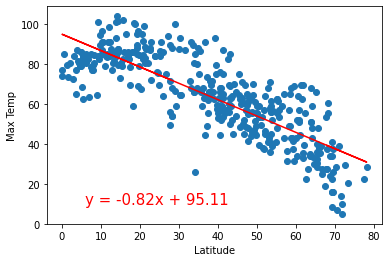

In [68]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7668153152076325


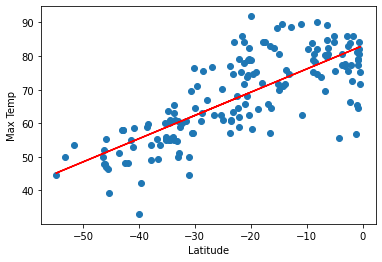

In [76]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10358336015746493


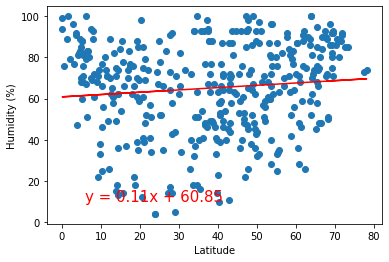

In [77]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11398928186062207


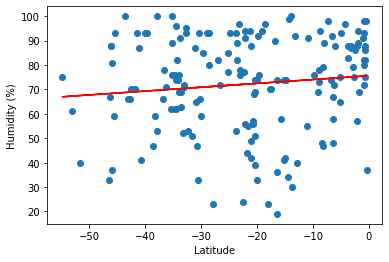

In [85]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.007627485925231673


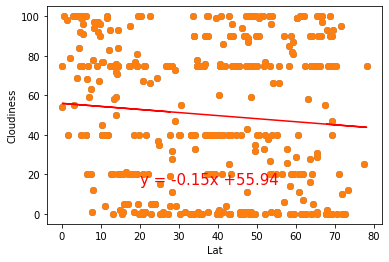

In [84]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
slope

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05294530205984352


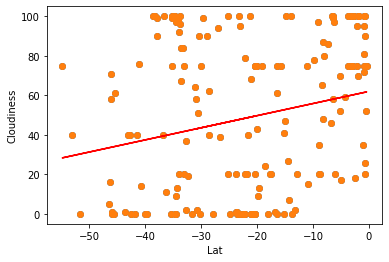

In [86]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
slope

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011478610492563554


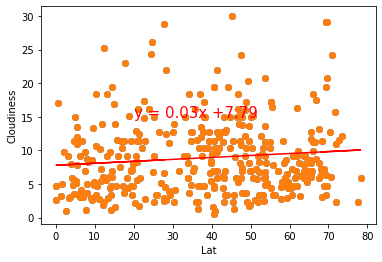

In [87]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
slope

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11293389416296593


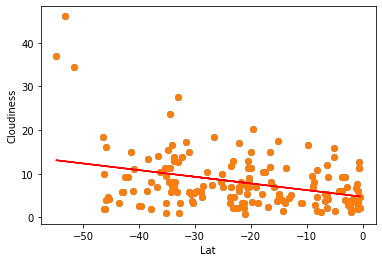

In [88]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
slope

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.11293389416296593


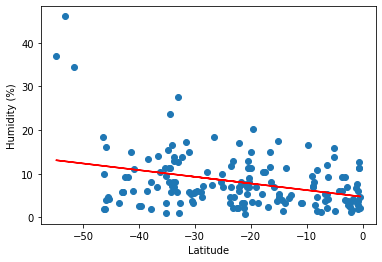

In [90]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")
plt.show()